In [1]:
import json
import glob

def lire_json(chemin):
    with open(chemin, "r", encoding="utf-8") as fin:
        dic = json.load(fin)
    return dic

def ecrire_json(chemin, dic):
    with open(chemin, "w", encoding="utf-8") as fout:
        fout.write(json.dumps(dic, ensure_ascii=False, indent=2))

In [3]:
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

print(len(dic))

5685


In [5]:
new_dic = {}

for k, v in dic.items():
    mots = []
    tags = []
    for mot, tag in v[1]:
        mots.append(mot)
        tags.append(tag)
    new_dic[k] = []
    new_dic[k].append(mots)
    new_dic[k].append(tags)
    new_dic[k].append(v[0])
    
print(len(new_dic))

for k, v in new_dic.items():
    print(k, v)
    break

5685
french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498 [['Identification', 'de', 'trois', 'gènes', 'expliquant', 'la', 'virulence', 'de', 'la', 'grippe', 'espagnole', 'de', '1918'], ['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], 'Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918']


In [6]:
articles = [x for x in new_dic.keys()]
print(articles[0])

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498
[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [52]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nb_clusters = 4

#Tests sur les différents ngrams 
model = KMeans(n_clusters=nb_clusters)

V = TfidfVectorizer(ngram_range=(2,2))

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])
print(len(X))

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.19301054 0.53160774 0.30707082
  0.         0.         0.         0.         0.29592402 0.
  0.         0.         0.         0.         0.         0.
  0.         0.36211678 0.         0.2448418  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.32342

In [53]:
model.fit(X)

all_predictions = model.predict(X)

print(all_predictions[:100])

[0 0 3 0 1 1 0 0 2 2 3 3 1 0 0 2 2 0 0 0 3 3 0 2 3 0 3 0 2 2 2 2 1 3 2 3 1
 0 1 1 2 1 1 1 2 0 1 0 0 1 0 2 0 0 2 2 3 1 0 3 0 3 2 2 0 0 0 0 1 0 3 0 0 2
 0 3 0 1 2 3 0 1 0 1 0 0 0 0 0 2 3 0 0 3 1 1 1 0 1 1]


In [54]:
dic_res = {}

for i in range(len(X)):
    #print(X[i])
    num_cluster = all_predictions[i]
    titre = liste_titres[i]
    tags = liste_t[i]
    vecteur = X[i]
    dic_res.setdefault(num_cluster,  [])
    dic_res[num_cluster].append((titre, tags, vecteur))

In [56]:
from random import randint

echantillons = []

taille_echantillons = 5
    
for i in range(nb_clusters):
    echantillons.append([])
    #print(len(dic_res[i]))
    for j in range(taille_echantillons):
        indice = randint(0, len(dic_res[i]))
        #print(indice)
        echantillons[i].append(dic_res[i][indice][:1])

for i in range(len(echantillons)):
    print("Cluster %s : %s articles" % (i, len(dic_res[i])))
    for titre in echantillons[i]:
        print(titre)
    print("-"*10)

Cluster 0 : 2537 articles
('Médicaments : gare aux interactions avec les récipients',)
('Rhume : 10 remèdes pour le soulager... vite !',)
('Le rôle de la diaspora dans la relance socio-économique du Burundi',)
('Zimbabwe: Mugabe appelle son parti à "l\'unité" et refuse de suivre Bush vers la sortie',)
('Hôpital Cochin : Une erreur médicale coûte la vie à un enfant de 3 ans',)
----------
Cluster 1 : 921 articles
('23-01-2009 - Gabon : Adiahénot équipe la Marine marchande',)
('Un messager de Mugabe à Kosyam',)
("«CHER HÔPITAL, JE TE SOUHAITE D'ÊTRE ENCORE EN VIE»",)
("D'où viennent les milliards du Président Nkurunziza, par The Leadership Institute",)
('JUSTICE / Hormones de croissance : une Marnaise en colère',)
----------
Cluster 2 : 1358 articles
("La Wallonie privée d'eau: le point sur la situation",)
('L\'Iran déjoue un plan visant à "renverser en douceur" le gouvernement',)
("La mort annoncée d'Eluana, dans le coma depuis 17 ans, divise l'Italie",)
("Émeutes en Grèce après la mort 

In [57]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = V.get_feature_names()

for i in range(nb_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print('(%s)' % terms[ind], end='')
    print()

Cluster 0:(jj nn)(nn nn)(nns vbp)(nns nns)(nnp nn)(nn nns)(nn nnp)(nn in)(nnp nnp)(nnp vbz)
Cluster 1:(nnp nnp)(nnp nn)(nn nn)(nn nnp)(jj nn)(nnp vbz)(nnp fw)(nnp jj)(fw nnp)(fw nn)
Cluster 2:(nn nn)(nnp nn)(jj nn)(nn nnp)(nn jj)(nnp nnp)(nn in)(fw nn)(nn nns)(nnp jj)
Cluster 3:(fw fw)(fw nn)(nn fw)(nn nn)(nnp fw)(nnp nn)(fw nnp)(nnp nnp)(nn nnp)(jj nn)


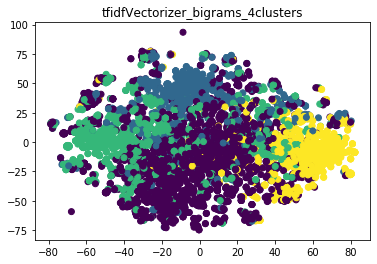

In [64]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model_tsne = TSNE(learning_rate=100)

# Fitting Model
transformed = model_tsne.fit_transform(X)

# Plotting 3d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# à faire : ajouter le numéro de cluster

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.title('tfidfVectorizer_bigrams_4clusters')
#plt.savefig("testbigrams5.png")
plt.show()